Fold 1: MSE = 104.20
Fold 2: MSE = 66.52
Fold 3: MSE = 63.17
Fold 4: MSE = 69.47
Fold 5: MSE = 105.17


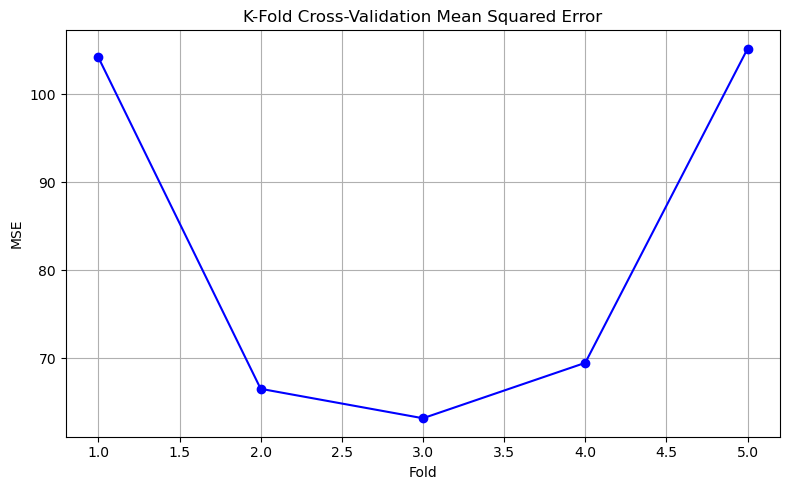


Average MSE over 5 folds: 81.71


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Initialize model
model = LinearRegression()

# Define K-Fold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store errors
mse_list = []

# Perform K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    print(f"Fold {fold}: MSE = {mse:.2f}")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, k+1), mse_list, marker='o', linestyle='-', color='blue')
plt.title('K-Fold Cross-Validation Mean Squared Error')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mean Error
print(f"\nAverage MSE over {k} folds: {np.mean(mse_list):.2f}")
